In [8]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import h5py
import pandas as pd
#Pre-run code
import os
import sys
import gc
os.listdir('/mnt/c/Users/jdpul/OneDrive/Desktop/Galacticus-dust-modelling-main/dust_model')
sys.path.append('/mnt/c/Users/jdpul/OneDrive/Desktop/Galacticus-dust-modelling-main')
sys.path.append('/mnt/c/Users/jdpul/OneDrive/Desktop/Galacticus-dust-modelling-main/dust_model')
import birth_clouds1

In [9]:
#Define functions that give Luminosity, Magnitude, and MergerTreeWeights. Plug data
#This def extracts the spheroid (name1) and disk (name2) Stellar luminosities from the Datasets above and adds them.
def L(name1, name2):
  return [x + y for x, y in zip(np.array(name1['Outputs/Output1/nodeData/spheroidLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000']), np.array(name2['Outputs/Output1/nodeData/diskLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000']))]
#Name 1 is the Luminosity produced by L(name1, name2), while Name 2 is the general hdf5 file uploaded (i.e. V100)

def Lv2(name1, name2, name3, name4):
  return [x + y + z + w for x, y, z, w in zip(np.array(name1['Outputs/Output1/nodeData/spheroidLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000']), np.array(name2['Outputs/Output1/nodeData/diskLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000']), np.array(name3['Outputs/Output1/nodeData/diskLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000:young']), np.array(name4['Outputs/Output1/nodeData/spheroidLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000:young']))]

Magnitude=np.arange(-24,-15,1)
def W(name1, name2):
   Table=pd.DataFrame({'Magnitude':name1, 'MergerTreeWeights':np.array(name2['Outputs/Output1/mergerTreeWeight'])}) 
   Table['binzz']=pd.cut(Table['Magnitude'], Magnitude)
   resultz=Table.groupby('binzz').agg(
       Sum=('MergerTreeWeights', 'sum')
   ).reset_index()
   return resultz

def M(name):
  for i in range(len(name)):
    if name[i]==0:    #Some Luminosities are 0 and log10(0)=Undefined when calculating Magnitudes
       name[i]=0.99999
  return -2.5*np.log10(name) 

wavelengths=np.geomspace(2875, 4375, num=1)

def fix(name):
    for i in range(len(name)):
        if np.isnan(name[i]) or name[i] == np.inf or name[i] < 1e-8:
            name[i] = 1e-8
    return name

def Rfix(name):
    for i in range (len(name)):
        if name[i] == 0:
           name[i]=1e-13
    return name
    
Magnitudes=np.arange(-24,-15,2)
Magnitude1=[-23.5, -22.5, -21.5, -20.5, -19.5, -18.5, -17.5, -16.5]

In [10]:
A05v2= h5py.File('LuminosityFuna0p5y.hdf5', 'r')
A05v3= h5py.File('LuminosityFuna0p5mc.hdf5', 'r')
A05v4= h5py.File('LuminosityFuna0p5mc1.hdf5', 'r')

In [11]:
A05v2['Outputs/Output1/nodeData'].keys()
Recent_d=np.array(A05v2['Outputs/Output1/nodeData/diskLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000:recent'])
Recent_s=np.array(A05v2['/Outputs/Output1/nodeData/spheroidLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000:recent'])
birth_s=np.array(A05v2['Outputs/Output1/nodeData/spheroidLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000:young'])
birth_d=np.array(A05v2['Outputs/Output1/nodeData/diskLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000:young'])
Default_s=np.array(A05v2['Outputs/Output1/nodeData/spheroidLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000'])
Default_d=np.array(A05v2['Outputs/Output1/nodeData/diskLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000'])

Recent_d1=np.array(A05v3['Outputs/Output1/nodeData/diskLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000:recent'])
Recent_s1=np.array(A05v3['/Outputs/Output1/nodeData/spheroidLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000:recent'])
birth_s1=np.array(A05v3['Outputs/Output1/nodeData/spheroidLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000:birth'])
birth_d1=np.array(A05v3['Outputs/Output1/nodeData/diskLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000:birth'])
Default_s1=np.array(A05v3['Outputs/Output1/nodeData/spheroidLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000'])
Default_d1=np.array(A05v3['Outputs/Output1/nodeData/diskLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000'])

Recent_d2=np.array(A05v4['Outputs/Output1/nodeData/diskLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000:recent'])
Recent_s2=np.array(A05v4['/Outputs/Output1/nodeData/spheroidLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000:recent'])
birth_s2=np.array(A05v4['Outputs/Output1/nodeData/spheroidLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000:birth'])
birth_d2=np.array(A05v4['Outputs/Output1/nodeData/diskLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000:birth'])
Default_s2=np.array(A05v4['Outputs/Output1/nodeData/spheroidLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000'])
Default_d2=np.array(A05v4['Outputs/Output1/nodeData/diskLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000'])

In [12]:
Z=(np.array(A05v2['Outputs/Output1/nodeData/diskAbundancesGasMetals'])/np.array(A05v2['Outputs/Output1/nodeData/diskMassGas']))
Z1=(np.array(A05v3['Outputs/Output1/nodeData/diskAbundancesGasMetals'])/np.array(A05v3['Outputs/Output1/nodeData/diskMassGas']))
Z2=(np.array(A05v4['Outputs/Output1/nodeData/diskAbundancesGasMetals'])/np.array(A05v4['Outputs/Output1/nodeData/diskMassGas']))
metallicities = fix(Z)
metallicities1 = fix(Z1)
metallicities2 = fix(Z2)

/tmp/ipykernel_41933/1199322640.py:1: RuntimeWarning: invalid value encountered in divide
  Z=(np.array(A05v2['Outputs/Output1/nodeData/diskAbundancesGasMetals'])/np.array(A05v2['Outputs/Output1/nodeData/diskMassGas']))
/tmp/ipykernel_41933/1199322640.py:2: RuntimeWarning: invalid value encountered in divide
  Z1=(np.array(A05v3['Outputs/Output1/nodeData/diskAbundancesGasMetals'])/np.array(A05v3['Outputs/Output1/nodeData/diskMassGas']))
/tmp/ipykernel_41933/1199322640.py:3: RuntimeWarning: invalid value encountered in divide
  Z2=(np.array(A05v4['Outputs/Output1/nodeData/diskAbundancesGasMetals'])/np.array(A05v4['Outputs/Output1/nodeData/diskMassGas']))


In [15]:
def disk_clouds_attenuation(metallicities, birth_list, default_list, wavelength):
    Ad_cloud = np.empty_like(metallicities, dtype=float)

    for i in range(len(metallicities)):
        clouds = birth_clouds1.birth_clouds(
            Zcloud=metallicities[i],
            Birth=birth_list[i],
            Default=default_list[i],
        )
        Ad_cloud[i] = clouds.attenuation(wavelength)
        Ad_cloud = np.nan_to_num(Ad_cloud, nan=1.0)

    return Ad_cloud

def spheroid_clouds_attenuation(metallicities, birth_list, default_list, wavelength):
    As_cloud = np.empty_like(metallicities, dtype=float)

    for i in range(len(metallicities)):
        clouds = birth_clouds1.birth_clouds(
            Zcloud=metallicities[i],
            Birth=birth_list[i],
            Default=default_list[i],
        )
        As_cloud[i] = clouds.attenuation(wavelength)
        As_cloud = np.nan_to_num(As_cloud, nan=1.0)

    return As_cloud

In [16]:
Ad=disk_clouds_attenuation(metallicities, birth_d, Default_d, 3000)
As=spheroid_clouds_attenuation(metallicities, birth_s, Default_s, 3000)

/tmp/ipykernel_41933/4030170569.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ad_cloud[i] = clouds.attenuation(wavelength)
/mnt/c/Users/jdpul/OneDrive/Desktop/Galacticus-dust-modelling-main/dust_model/birth_clouds1.py:60: RuntimeWarning: invalid value encountered in scalar divide
  return self.Birth/self.Default
/tmp/ipykernel_41933/4030170569.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  As_cloud[i] = clouds.attenuation(wavelength)


In [17]:
L_atts=Default_s-Recent_s+Recent_s*As

In [18]:
L_attd=Default_d-Recent_d+Recent_d*Ad

In [19]:
L1_att=L_atts+L_attd

In [20]:
Ad1=disk_clouds_attenuation(metallicities1, birth_d1, Default_d1, 3000)
As1=spheroid_clouds_attenuation(metallicities1, birth_s1, Default_s1, 3000)
L_attd1=Default_d1-Recent_d1+Recent_d1*Ad1
L_atts1=Default_s1-Recent_s1+Recent_s1*As1
L2_att1=L_atts1+L_attd1

/tmp/ipykernel_41933/4030170569.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ad_cloud[i] = clouds.attenuation(wavelength)
/tmp/ipykernel_41933/4030170569.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  As_cloud[i] = clouds.attenuation(wavelength)


In [21]:
Ad2=disk_clouds_attenuation(metallicities2, birth_d2, Default_d2, 3000)
As2=spheroid_clouds_attenuation(metallicities2, birth_s2, Default_s2, 3000)
L_attd2=Default_d2-Recent_d2+Recent_d2*Ad2
L_atts2=Default_s2-Recent_s2+Recent_s2*As2
L3_att1=L_atts2+L_attd2

/tmp/ipykernel_41933/4030170569.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ad_cloud[i] = clouds.attenuation(wavelength)
/tmp/ipykernel_41933/4030170569.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  As_cloud[i] = clouds.attenuation(wavelength)


In [22]:
A05v2L=L(A05v2, A05v2)
A05v2M=M(A05v2L)
A05v2W=W(A05v2M, A05v2)

/tmp/ipykernel_41933/2631725876.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultz=Table.groupby('binzz').agg(


In [23]:
M1_att=M(L1_att)
M1_attW=W(M1_att, A05v2)

M2_att=M(L2_att1)
M2_attW=W(M2_att, A05v3)

M3_att=M(L3_att1)
M3_attW=W(M3_att, A05v4)

/tmp/ipykernel_41933/2631725876.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultz=Table.groupby('binzz').agg(
/tmp/ipykernel_41933/2631725876.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultz=Table.groupby('binzz').agg(
/tmp/ipykernel_41933/2631725876.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultz=Table.groupby('binzz').agg(


Text(0, 0.5, 'Log($\\Phi$, $[{\\rm Mpc}^{-3}M_{UV}^{-1}]$)')

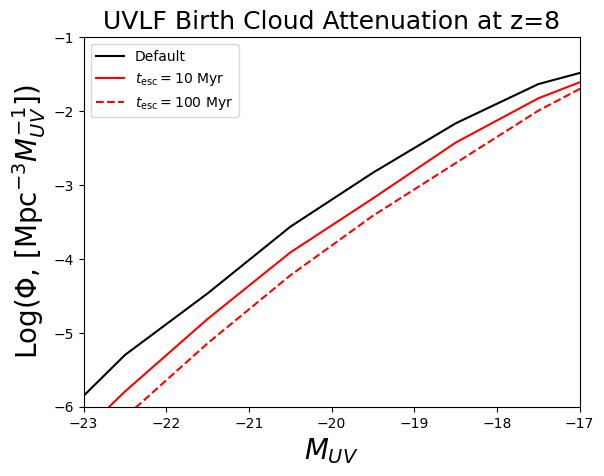

In [26]:
plt.title("UVLF Birth Cloud Attenuation at z=8", fontsize=18)
plt.plot(Magnitude1, np.log10(np.array(A05v2W['Sum'])), label=r'Default', color='black')
plt.plot(Magnitude1, np.log10(np.array(M2_attW['Sum'])), label=r'$t_\mathrm{{esc}} = 10$ Myr', color='red')
plt.plot(Magnitude1, np.log10(np.array(M3_attW['Sum'])), label=r'$t_\mathrm{{esc}} = 100$ Myr', color='red', ls='--')
plt.legend()
plt.ylim([-6, -1])
plt.xlim([-23, -17])
plt.xlabel(r'$M_{UV}$', fontsize=20)
plt.ylabel(r"Log($\Phi$, $[{\rm Mpc}^{-3}M_{UV}^{-1}]$)", fontsize=20)